In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# import modules we need here

In [27]:
df = pd.read_csv(r"C:\Users\mersc\Desktop\Solar_Project\Project_fantastic_five\dataset_wandersleben.csv")
df.head() 

#read the csv file and print out the first 5 lines

,time,PVA Wandersleben / Gesamtertrag / Zaehleraenderung [kWh],tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2018-01-01,117.928,6.7,3.7,10.7,0.1,0.0,213.4,32.4,66.6,1001.6,183.0
1,2018-02-01,69.272,2.3,-0.7,4.7,1.1,0.0,229.3,21.2,48.2,1001.1,229.0
2,2018-03-01,56.669,-8.8,-12.8,-4.3,0.0,0.0,66.7,19.1,43.9,1014.3,575.0
3,2018-04-01,30.260,3.1,0.6,6.1,2.5,0.0,284.4,17.3,38.2,1006.0,53.0
4,2018-05-01,24.557,9.3,4.1,13.4,0.0,0.0,230.4,27.4,61.9,1010.7,676.0


In [28]:
df = df.drop(['tmin', 'tmax', 'snow', 'wdir', 'wspd', 'wpgt', 'pres'], axis=1)
df.head()
# remove all columns except the ones we do the model with

,time,PVA Wandersleben / Gesamtertrag / Zaehleraenderung [kWh],tavg,prcp,tsun
0,2018-01-01,117.928,6.7,0.1,183.0
1,2018-02-01,69.272,2.3,1.1,229.0
2,2018-03-01,56.669,-8.8,0.0,575.0
3,2018-04-01,30.260,3.1,2.5,53.0
4,2018-05-01,24.557,9.3,0.0,676.0


In [32]:
df.dtypes
# show data types, just to be safe

df['time'] = pd.to_datetime(df['time'])

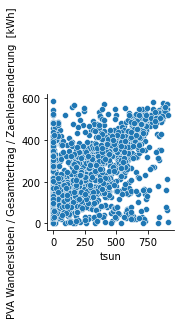

In [33]:
sns.pairplot(df,x_vars=['tsun'],y_vars=['PVA Wandersleben / Gesamtertrag / Zaehleraenderung  [kWh]'])
# illustrate our data for the first time

In [38]:
for col in df.columns:
    print(col)
# print out all left columns

df.columns = ['time', 'kwH', 'tempavg', 'pcp', 'sun']
df['month'] = df['time'].dt.month
df.head()
# rename columns

time
kwH
tempavg
pcp
sun


,time,kwH,tempavg,pcp,sun,month
0,2018-01-01,117.928,6.7,0.1,183.0,1
1,2018-02-01,69.272,2.3,1.1,229.0,2
2,2018-03-01,56.669,-8.8,0.0,575.0,3
3,2018-04-01,30.260,3.1,2.5,53.0,4
4,2018-05-01,24.557,9.3,0.0,676.0,5


In [39]:
df.corr()
# show correlations between variables

,kwH,tempavg,pcp,sun,month
kwH,1.000000,0.408622,-0.087033,0.598035,-0.134180
tempavg,0.408622,1.000000,0.041409,0.501300,0.213690
pcp,-0.087033,0.041409,1.000000,-0.226016,-0.027426
sun,0.598035,0.501300,-0.226016,1.000000,-0.076445
month,-0.134180,0.213690,-0.027426,-0.076445,1.000000


In [48]:
df.dropna(inplace=True)
# drop nan values

In [47]:
X = df[['sun', 'tempavg', 'pcp', 'month']]
X.head()

,sun,tempavg,pcp,month
0,183.0,6.7,0.1,1
1,229.0,2.3,1.1,2
2,575.0,-8.8,0.0,3
3,53.0,3.1,2.5,4
4,676.0,9.3,0.0,5


In [43]:
Y = df['kwH']
X.shape

(1441, 4)

In [44]:
# import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 4)
(577, 4)
(864,)
(577,)


In [45]:
# fitting the regression model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [46]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, model.predict(X_test))
# mae = Mittel von allen Abweichungen

97.37490989016192